In [ ]:
!tar -xvf /content/drive/MyDrive/lfw.tgz

Streaming output truncated to the last 5000 lines.
lfw/Luis_Sanchez/
lfw/Luis_Sanchez/Luis_Sanchez_0001.jpg
lfw/Juliette_Binoche/
lfw/Juliette_Binoche/Juliette_Binoche_0001.jpg
lfw/Joel_Todd/
lfw/Joel_Todd/Joel_Todd_0001.jpg
lfw/Allan_Wagner/
lfw/Allan_Wagner/Allan_Wagner_0001.jpg
lfw/Alejandro_Fernandez/
lfw/Alejandro_Fernandez/Alejandro_Fernandez_0001.jpg
lfw/Guillaume_Depardieu/
lfw/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw/Delphine_Chuillot/
lfw/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw/Paul_LeClerc/
lfw/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw/Eddie_Jordan/
lfw/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw/Lionel_Richie/
lfw/Lionel_Richie/Lionel_Richie_0001.jpg
lfw/Lionel_Richie/Lionel_Richie_0002.jpg
lfw/Jose_Viegas_Filho/
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw/Roger_Mahony/
lfw/Roger_Mahony/Roger_Mahony_0001.jpg
lfw/Clay_Aiken/
lfw/Clay_Aiken/Clay_Aiken_0001.jpg
lfw/Clay_Aiken/Clay_Aiken_0002.jpg
lfw/Clay_Ai

In [ ]:
import glob


data_img=glob.glob('/content/lfw/*/*.jpg')
len(data_img)

13233

In [ ]:
data_img[:5]

['/content/lfw/Charles_Bronson/Charles_Bronson_0002.jpg',
 '/content/lfw/Charles_Bronson/Charles_Bronson_0001.jpg',
 '/content/lfw/Charles_Bronson/Charles_Bronson_0003.jpg',
 '/content/lfw/Guillermo_Coria/Guillermo_Coria_0009.jpg',
 '/content/lfw/Guillermo_Coria/Guillermo_Coria_0025.jpg']

In [ ]:
import tensorflow as tf

In [ ]:
def preprocess_frame(frame_path):
  frame = tf.keras.preprocessing.image.load_img(frame_path, target_size=(100,100,3))
  frame = tf.keras.preprocessing.image.img_to_array(frame)
  frame = frame/255.
  return frame

In [ ]:
frames=[]
for i in data_img:
  frames.append(preprocess_frame(i))

In [ ]:
frames[0].shape

(100, 100, 3)

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

frames = np.array(frames)
frames.shape

(13233, 100, 100, 3)

In [ ]:
train_frames, val_frames = train_test_split(frames, test_size=0.3)

In [ ]:
train_frames.shape

(9263, 100, 100, 3)

In [ ]:
import cv2


def rescale_frame(frame, percent=40):
    width = int(frame.shape[1] * percent/ 100)
    height = int(frame.shape[0] * percent/ 100)
    dim = (width, height)
    low_frame = cv2.resize(frame, dim, interpolation =cv2.INTER_AREA)

    width = int(low_frame.shape[1] * 100 / percent)
    height = int(low_frame.shape[0] * 100 / percent)
    dim = (width, height)
    fin_frame= cv2.resize(low_frame, dim, interpolation =cv2.INTER_AREA)
    return fin_frame

In [ ]:
train_low_resolution_frames=[]

for i in range(train_frames.shape[0]):
  train_low_resolution_frames.append(rescale_frame(train_frames[i]))

In [ ]:
train_low_resolution_frames=np.array(train_low_resolution_frames)


In [ ]:
train_low_resolution_frames.shape

(9263, 100, 100, 3)

In [ ]:
val_low_resolution_frames=[]

for i in range(val_frames.shape[0]):
  val_low_resolution_frames.append(rescale_frame(val_frames[i]))

In [ ]:
val_low_resolution_frames=np.array(val_low_resolution_frames)


In [ ]:
val_low_resolution_frames.shape

(3970, 100, 100, 3)

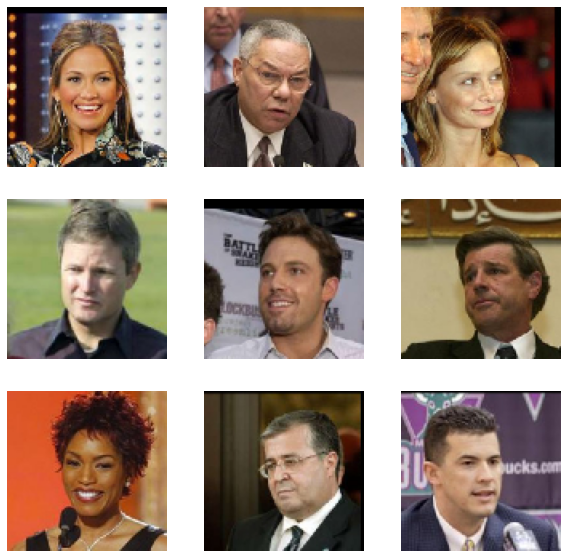

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i, (image) in enumerate(train_frames[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    #plt.title(int(label))
    plt.axis('off')

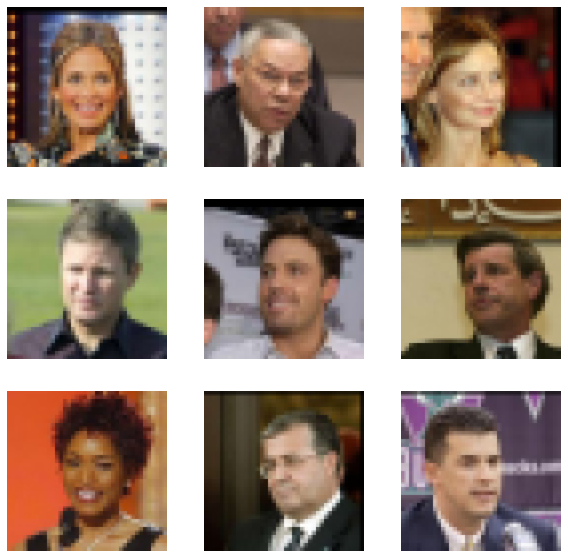

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))

for i, (image) in enumerate(train_low_resolution_frames[:9]):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    #plt.title(int(label))
    plt.axis('off')

In [ ]:
from tensorflow.keras import Model, Input, regularizers
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Add, Dropout

In [ ]:
Input_img = Input(shape=(100,100, 3))

#encoding architecture
x1 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(Input_img)
x2 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x1)
x3 = MaxPool2D(padding='same')(x2)
x4 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x3)
x5 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x4)
x6 = MaxPool2D(padding='same')(x5)
encoded = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x6)
#encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)
# decoding architecture
x7 = UpSampling2D()(encoded)
x8 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x7)
x9 = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x8)
x10 = Add()([x5, x9])
x11 = UpSampling2D()(x10)
x12 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x11)
x13 = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l1(10e-10))(x12)
x14 = Add()([x2, x13])
decoded = Conv2D(3, (3, 3), padding='same',activation='relu', kernel_regularizer=regularizers.l1(10e-10))(x14)
autoencoder = Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse', metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 100, 100, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 50, 50, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [ ]:
autoencoder.fit(train_low_resolution_frames,train_frames,
            epochs=100,
            validation_data=(val_low_resolution_frames, val_frames))

Epoch 1/100
290/290 [==============================] - 83s 167ms/step - loss: 0.0040 - accuracy: 0.8681 - val_loss: 0.0020 - val_accuracy: 0.9046
Epoch 2/100
290/290 [==============================] - 47s 163ms/step - loss: 0.0019 - accuracy: 0.9102 - val_loss: 0.0018 - val_accuracy: 0.9087
Epoch 3/100
290/290 [==============================] - 47s 162ms/step - loss: 0.0017 - accuracy: 0.9187 - val_loss: 0.0017 - val_accuracy: 0.9273
Epoch 4/100
290/290 [==============================] - 47s 163ms/step - loss: 0.0017 - accuracy: 0.9195 - val_loss: 0.0017 - val_accuracy: 0.9258
Epoch 5/100
290/290 [==============================] - 52s 178ms/step - loss: 0.0016 - accuracy: 0.9210 - val_loss: 0.0017 - val_accuracy: 0.9179
Epoch 6/100
290/290 [==============================] - 47s 163ms/step - loss: 0.0016 - accuracy: 0.9262 - val_loss: 0.0016 - val_accuracy: 0.9177
Epoch 7/100
290/290 [==============================] - 47s 163ms/step - loss: 0.0016 - accuracy: 0.9246 - val_loss: 0.0016 -

In [ ]:
autoencoder.save_weights('super_res.h5')

In [ ]:
with open('super_res.json','w') as f:
    f.write(autoencoder.to_json())

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
test_img=preprocess_frame('/content/test.jfif')

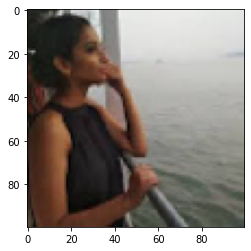

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=rescale_frame(test_img)

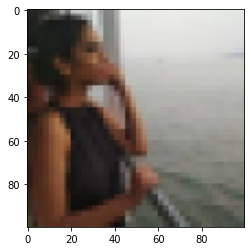

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img=np.expand_dims(test_img,0)
test_img.shape

(1, 100, 100, 3)

In [ ]:
test_res=autoencoder.predict(test_img)

In [ ]:
test_res.shape

(1, 100, 100, 3)

In [ ]:
test_res=test_res.reshape((test_res.shape[1],test_res.shape[2],3))

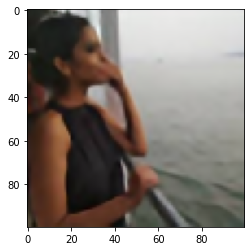

In [ ]:
plt.imshow(test_res)

In [ ]:
json_file = open('/content/super_res.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
autoencoder = tf.keras.models.model_from_json(loaded_model_json)
# load weights into new model
autoencoder.load_weights("/content/super_res.h5")